In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
import sklearn as skl
import keras_tuner as kt
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Study data files
diabetes_binary_health_path = "Ressources/diabetes_binary_health_indicators_BRFSS2015.csv"
# Read the  data and the study results
df_diabetes = pd.read_csv(diabetes_binary_health_path)

df_diabetes.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [3]:
values = df_diabetes['Diabetes'].value_counts()
values

0    218334
1     35346
Name: Diabetes, dtype: int64

In [4]:
# Convert categorical data to numeric with `pd.get_dummies`
df_diabetes = pd.get_dummies(df_diabetes, dtype=float)

In [5]:
# split the dataset into feature and target
X = df_diabetes.copy()
X.drop('Diabetes', axis=1)
X.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [6]:
y = df_diabetes['Diabetes'].values.reshape(-1,1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [7]:
# split the data into training and testing dadaset by train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# Create the StandardScaler instance
X_scaler = skl.preprocessing.StandardScaler()

In [9]:
# Fit the Standard Scaler with the training data
X_scaler.fit(X_train)

StandardScaler()

In [10]:
# transform the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Create the Keras Sequential model
model = tf.keras.models.Sequential()

In [12]:
# Layers
model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=len(X_train_scaled[0])))
model.add(tf.keras.layers.Dense(units=5, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [13]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 115       
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the Sequential model together and customize metrics
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
5946/5946 [==============================] - 39s 6ms/step - loss: 0.0800 - accuracy: 0.9719
Epoch 2/50
5946/5946 [==============================] - 28s 5ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 3/50
5946/5946 [==============================] - 23s 4ms/step - loss: 3.1020e-04 - accuracy: 1.0000
Epoch 4/50
5946/5946 [==============================] - 24s 4ms/step - loss: 2.8148e-05 - accuracy: 1.0000
Epoch 5/50
5946/5946 [==============================] - 25s 4ms/step - loss: 2.5626e-06 - accuracy: 1.0000
Epoch 6/50
5946/5946 [==============================] - 21s 3ms/step - loss: 2.5287e-07 - accuracy: 1.0000
Epoch 7/50
5946/5946 [==============================] - 21s 3ms/step - loss: 3.9548e-08 - accuracy: 1.0000
Epoch 8/50
5946/5946 [==============================] - 21s 3ms/step - loss: 1.4224e-08 - accuracy: 1.0000
Epoch 9/50
5946/5946 [==============================] - 21s 3ms/step - loss: 8.4383e-09 - accuracy: 1.0000
Epoch 10/50
5946/5946 [======================

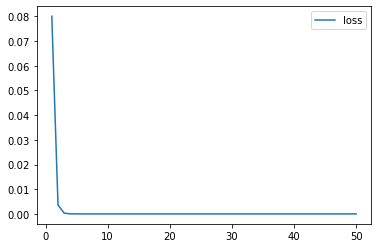

In [15]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

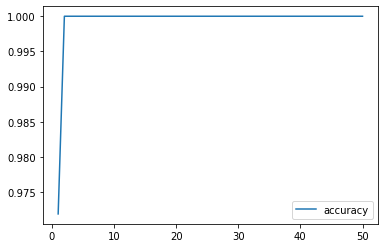

In [16]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 3s - loss: 4.1447e-09 - accuracy: 1.0000 - 3s/epoch - 2ms/step
Loss: 4.144707688169547e-09, Accuracy: 1.0


In [20]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [21]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

/var/folders/2z/s_gmznmx4sb0cn5q7ltc3nkc0000gn/T/ipykernel_31751/478868177.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train_scaled, y_train)


In [22]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [23]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [24]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,54657,0
Actual 1,0,8763


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54657
           1       1.00      1.00      1.00      8763

    accuracy                           1.00     63420
   macro avg       1.00      1.00      1.00     63420
weighted avg       1.00      1.00      1.00     63420



In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    
    # create model
    model = tf.keras.models.Sequential()
    
    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu', 'tanh', 'sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    model.add(tf.keras.layers.Dense(units=4, activation=activation, input_dim=len(X_train_scaled[0])))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    model.add(tf.keras.layers.Dense(units=4, activation=activation))
        
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
# Create a `Hyperband()` tuner instance
tuner = kt.Hyperband(create_model, objective='val_accuracy', max_epochs=10, hyperband_iterations=2)

In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))

In [ ]:
# Get top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

In [ ]:
# Evaluate the top 3 models against the test dataset
top_models = tuner.get_best_models(3)
for model in top_models:
    loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
    print(f"Loss: {loss}, Accuracy: {accuracy}")

In [ ]:
# Compare the performance to the second-best model
second_best_model = tuner.get_best_models(2)[1]
loss, accuracy = second_best_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {loss}, Accuracy: {accuracy}")